<a href="https://colab.research.google.com/github/jadhav-rakesh/ML/blob/main/ds14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trees and Forests

In [1]:
import numpy as np
import pandas as pd

* In a decision tree, every decision rule occurs at a decision node
* A branch without a decision rule at the end is called a leaf.

# Training a Decision Tree Classifier

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

iris = datasets.load_iris()

features, target = iris.data, iris.target

decisiontree = DecisionTreeClassifier(random_state=42)

model = decisiontree.fit(features, target)

* Decision tree learners attempt to find a decision rule that produces the greatest decrease in impurity at a node
*Gini impurity


In [3]:
observation = [[5, 4, 3, 2]]

model.predict(observation)

array([1])

In [6]:
model.predict_proba(observation)

array([[0., 1., 0.]])

In [7]:
decisiontree_entropy = DecisionTreeClassifier(criterion="entropy",
                                              random_state=42)

model_entropy = decisiontree_entropy.fit(features, target)

#Training a Decision Tree Regressor

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

diabetes = datasets.load_diabetes()

features, target = diabetes.data, diabetes.target

decisiontree = DecisionTreeRegressor(random_state=42)

model = decisiontree.fit(features, target)


#how much they reduce mean squared error (MSE)

In [10]:
observation = [features[0]]

model.predict(observation)

array([151.])

In [11]:
decisiontree_mae = DecisionTreeRegressor(criterion="absolute_error", random_state=0)

model_mae = decisiontree_mae.fit(features, target)

# Visualizing a Decision Tree Model

In [14]:
!pip install Ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.2 MB/s eta 0:00:00


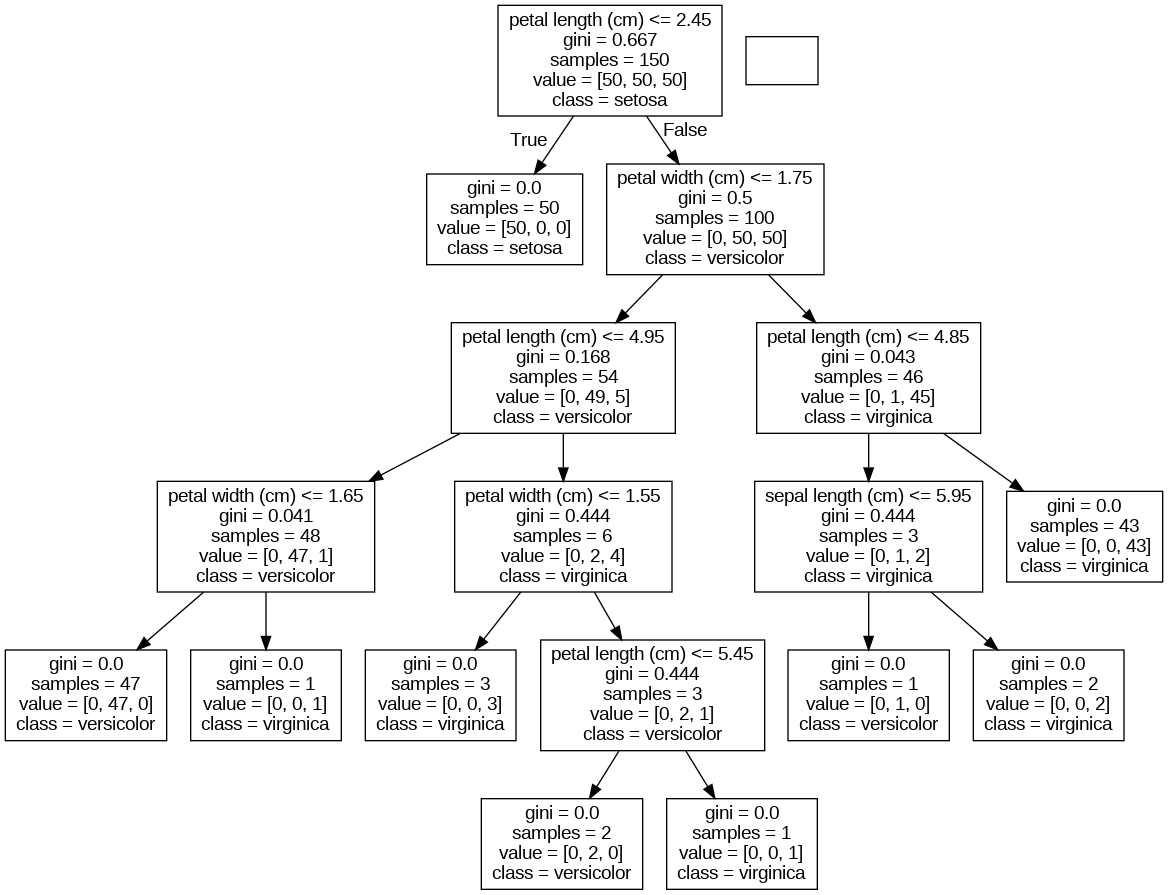

In [18]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

iris = datasets.load_iris()

features, target = iris.data, iris.target

decisiontree = DecisionTreeClassifier(random_state=42)

model = decisiontree.fit(features, target)

dot_data = tree.export_graphviz(decisiontree,
                                out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [19]:
graph.write_pdf("iris.pdf")

True

In [20]:
graph.write_png("iris.png")

True

#Training a Random Forest Classifier

In [21]:
#train a classification model using a “forest” of randomized decision trees.

from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()

features, target = iris.data, iris.target

randomforest = RandomForestClassifier(random_state=42, n_jobs=-1)

model = randomforest.fit(features, target)

In [22]:
observation = [[5, 4, 3, 2]]

model.predict(observation)

array([1])

In [23]:
randomforest_entropy = RandomForestClassifier(criterion="entropy",
                                              random_state=42)

model_entropy = randomforest_entropy.fit(features, target)

#Training a Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

diabetes = datasets.load_diabetes()

features, target = diabetes.data, diabetes.target

randomforest = RandomForestRegressor(random_state=42, n_jobs=-1)

model = randomforest.fit(features, target)

* max_features
* bootstrap
* n_estimators

#Evaluating Random Forests with Out-of-Bag Errors

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()

features, target = iris.data, iris.target

randomforest = RandomForestClassifier(random_state=42,
                                      n_estimators=1000,
                                      oob_score=True,
                                      n_jobs=-1)

model = randomforest.fit(features, target)

randomforest.oob_score_

0.9533333333333334

* that for every tree there is a separate subset of observations not being used to train that tree. These are called out-of-bag (OOB) observations.

#Identifying Important Features in Random Forests

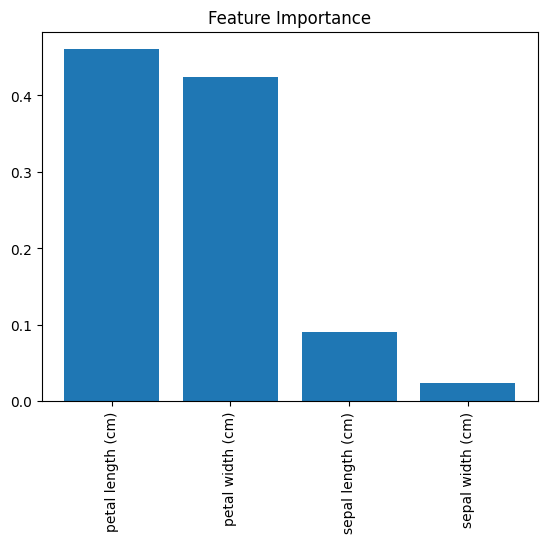

In [26]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()

features, target = iris.data, iris.target

randomforest = RandomForestClassifier(random_state=0,
                                      n_jobs=-1)

model = randomforest.fit(features, target)

importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

names = [iris.feature_names[i] for i in indices]

plt.figure()
plt.title("Feature Importance")
plt.bar(range(features.shape[1]), importances[indices])
plt.xticks(range(features.shape[1]), names, rotation=90)
plt.show()

In [27]:
model.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

#Selecting Important Features in Random Forests

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

iris = datasets.load_iris()

features, target = iris.data, iris.target

randomforest = RandomForestClassifier(random_state=42, n_jobs=-1)

selector = SelectFromModel(randomforest, threshold=0.3)

features_important = selector.fit_transform(features, target)

model = randomforest.fit(features_important, target)

#Handling Imbalanced Classes

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

iris = datasets.load_iris()

features, target = iris.data, iris.target

features = features[40:, :]
target = target[40:]

target = np.where((target==0), 0, 1)

randomforest = RandomForestClassifier(random_state=42,
                                      n_jobs=-1,
                                      class_weight="balanced")

model = randomforest.fit(features, target)

In [31]:
#weight for small class

110/(2*10)

5.5

In [32]:
#weight for large class

110/(2*100)

0.55

#Controlling Tree Size

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

iris = datasets.load_iris()

features, target = iris.data, iris.target

decisiontree = DecisionTreeClassifier(random_state=42,
                                      max_depth=None, #tree is grown until all leaves are pure
                                      min_samples_split=2, #Minimum number of observations at a node before that node is split
                                      min_samples_leaf=1, #Minimum number of observations required to be at a leaf
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0)

model = decisiontree.fit(features, target)

#Improving Performance Through Boosting

In [34]:
#You need a model with better performance than decision trees or random forests

from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

iris = datasets.load_iris()

features, target = iris.data, iris.target

adaboost = AdaBoostClassifier(random_state=42)

model = adaboost.fit(features, target)


* AdaBoost, we iteratively train a series of weak models (most often a shallow decision tree, sometimes called a stump), each iteration giving higher priority to observations the previous model predicted incorrectly.

* base_estimator - learning algorithm to use to train the weak models

* n_estimators -  the number of models to iteratively train

* learning_rate - the contribution of each model to the weights,

* loss - loss function to use when updating weight

#Training an XGBoost Model

In [35]:
import xgboost as xgb
from sklearn import datasets, preprocessing
from sklearn.metrics import classification_report
from numpy import argmax

iris = datasets.load_iris()

features, target = iris.data, iris.target

xgb_train = xgb.DMatrix(features, label=target)

param = { "objective": "multi:softprob",
         "num_class": 3}

gbm = xgb.train(param, xgb_train)

predictions = argmax(gbm.predict(xgb_train), axis=1)

print(classification_report(target, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.96      0.98        50
           2       0.96      1.00      0.98        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



* XGBoost (Extreme Gradient Boosting)

# Improving Real-Time Performance with LightGBM

In [38]:
!pip install lightgbm

In [40]:
import lightgbm as lgb
from sklearn import datasets, preprocessing
from sklearn.metrics import classification_report
from numpy import argmax

iris = datasets.load_iris()

feautres, target = iris.data, iris.target

lgb_train = lgb.Dataset(features, target)

params = {
    "objective": "multiclass",
    "num_class": 3,
    "verbose":-1
}

gbm = lgb.train(params, lgb_train)

predictions = argmax(gbm.predict(features), axis=1)

print(classification_report(target, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

